
# Logistic Regression
###### *Shaiq Munir Malik*



### Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{0, +1\})$.
Your goal in this assignment is to implement Logistic Regression classifier. Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$ . 

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack+\frac{\lambda}{2}\sum_{i=1}^k \theta_k^2$$

The gradient of this cost functions is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,k$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}+\lambda*\theta_k$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [1]:
%pylab inline
import scipy.stats
from collections import defaultdict  # default dictionary 
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tools as t # set of tools for plotting, data splitting, etc..

### Create some dummy data for testing

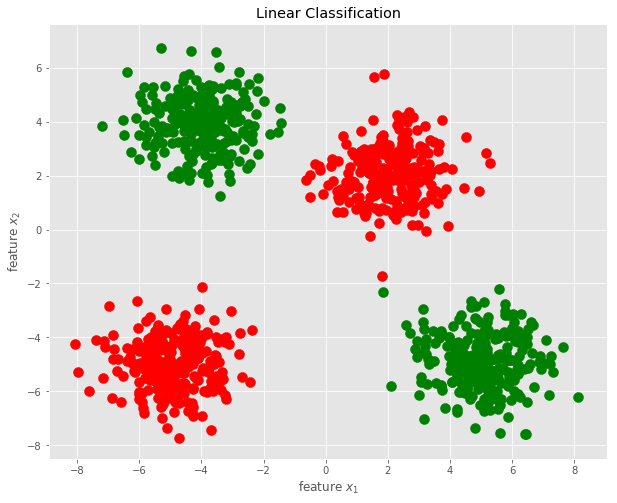

In [3]:
#Please carefully read the code to understand it...
np.random.seed(seed=99)

# make some data up
mean1 = np.array([-5,-5])
mean2 = np.array([2,2])
mean3 = np.array([5,-5])
mean4 = np.array([-4,4])

#Little Challenging...
# mean1 = np.array([-3,-3])
# mean2 = np.array([2,2])
# mean3 = np.array([3,-3])
# mean4 = np.array([-2,2])
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=1000
x1 = np.random.multivariate_normal(mean1,cov,nexamples/4)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/4)

x3 = np.random.multivariate_normal(mean3,cov,nexamples/4)
x4 = np.random.multivariate_normal(mean4,cov,nexamples/4)

X=np.vstack((x1,x2,x3,x4))
Y=np.vstack((1*np.ones((nexamples/2,1)),-1*np.zeros((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='r', s=100)
plt.scatter(x3[:,0],x3[:,1], c='g', s=100)
plt.scatter(x4[:,0],x4[:,1], c='g', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-lr.svg',format='svg')

In [4]:
mx=np.mean(X,axis=0)
stdx=np.std(X,axis=0)
X=(X-mx)/stdx

In [5]:
import tensorflow as tf

In [6]:
sess=tf.InteractiveSession()

In [7]:
alpha=0.9 # learning rate
epochs=1000 # number of epochs..

In [8]:
nexamples=X.shape[0]

In [9]:
# your code here
# Xi, Yi should be placeholders and h should be hypothesis
y=tf.placeholder(tf.float32,[None,1])
x=tf.placeholder(tf.float32,[None,2])
w1=tf.Variable(tf.random_normal([2,3]))
w2=tf.Variable(tf.random_normal([3,1]))
b1=tf.Variable(tf.random_normal([3]))
b2=tf.Variable(tf.random_normal([1]))
layer1=tf.add(tf.matmul(x,w1),b1)
layer1=tf.nn.sigmoid(layer1)
layer2=tf.add(tf.matmul(layer1,w2),b2)
layer2=tf.nn.sigmoid(layer2)
cost=tf.add(tf.negative(tf.multiply(y,tf.log(layer2))),tf.negative(tf.multiply(tf.subtract(1.0,y),tf.log(tf.subtract(1.0,layer2)))))
loss = tf.reduce_mean(cost)
optimizer=tf.train.GradientDescentOptimizer(0.9).minimize(loss)

init=tf.global_variables_initializer()

In [10]:
#with tf.Session() as sess:
sess.run(init)

for e in range (epochs):        
    Xsplit=np.split(X,20)# batch size of 100
    Ysplit=np.split(Y,20) 

    for i in range(len(Xsplit)):
        sess.run(optimizer,feed_dict={x:Xsplit[i],y:Ysplit[i]})

    if e % 10 ==0:
        print ('After {} Epochs Loss Function Value is {}'.format(e, sess.run(loss,feed_dict={x:X,y:Y})))

theta=np.array(sess.run(w1))
bias=np.array(sess.run(b1))
res=np.array(sess.run(layer2,feed_dict={x:X}))
print theta, bias

After 0 Epochs Loss Function Value is 1.72003757954
After 10 Epochs Loss Function Value is 0.816083490849
After 20 Epochs Loss Function Value is 0.777500033379
After 30 Epochs Loss Function Value is 0.746486783028
After 40 Epochs Loss Function Value is 0.0909191966057
After 50 Epochs Loss Function Value is 0.0291948989034
After 60 Epochs Loss Function Value is 0.0184666570276
After 70 Epochs Loss Function Value is 0.0138224177063
After 80 Epochs Loss Function Value is 0.0111893517897
After 90 Epochs Loss Function Value is 0.00948569644243
After 100 Epochs Loss Function Value is 0.00828543491662
After 110 Epochs Loss Function Value is 0.00738834496588
After 120 Epochs Loss Function Value is 0.00668888958171
After 130 Epochs Loss Function Value is 0.00612605083734
After 140 Epochs Loss Function Value is 0.00566196581349
After 150 Epochs Loss Function Value is 0.0052718129009
After 160 Epochs Loss Function Value is 0.00493858521804
After 170 Epochs Loss Function Value is 0.00465020863339


-1.78198707585 -1.78273724891 2.00638590366 2.00705094357
(1000, 2)


/home/shaiq/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.


(-1.6320596271601668, 1.8546373948001498)

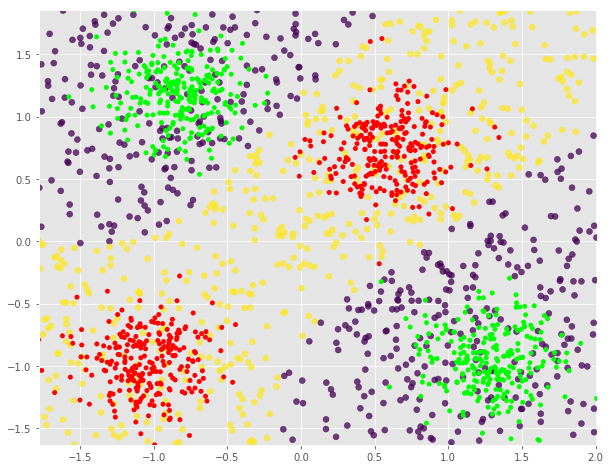

In [11]:
npts=1000
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

print tx.min(), X.min(), tx.max(), X.max()
#tx=np.hstack((tx,np.ones((tx.shape[0],1))))
print tx.shape

cs= np.array(sess.run(layer2,feed_dict={x:tx}))  > 0.5
#print cs.flatten(), np.unique(cs).flatten()

ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.75)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y),), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

In [12]:
Xt=sess.run(layer1,feed_dict={x:X})

In [13]:
print Xt.shape, Y.shape

(1000, 3) (1000, 1)


In [14]:
d=np.array(sess.run(b2)).flatten()# plane bias
normal=np.array(sess.run(w2)).flatten() # plane normal

In [15]:
print normal,d

[ 15.58250237  -8.6312685  -15.70007324] [ 0.62933314]


In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


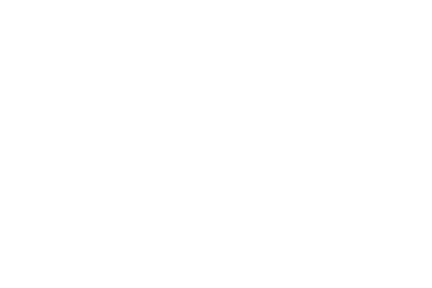

<IPython.core.display.Javascript object>


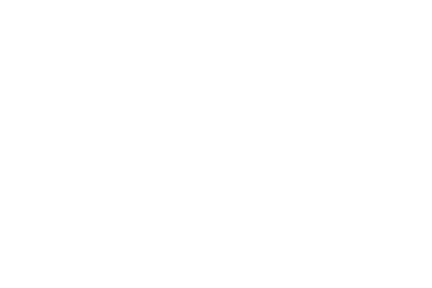

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(xs, ys, zs, c=c, marker=m)

ax.scatter(Xt[500:,0],Xt[500:,1],Xt[500:,2], c='r', s=100)
ax.scatter(Xt[:500,0],Xt[:500,1],Xt[500:,2], c='g', s=100)

# create x,y
xx, yy = np.meshgrid(np.arange(0,1,0.1), np.arange(0,1,0.1))

# # calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

#plot the plane...
#ax.plot_surface(xx,yy,z,rstride=1, cstride=1,
                    #facecolors=cm.jet(N),
#                    #linewidth=0, antialiased=False, shade=False
#                   alpha=0.7)

ax.set_xlabel('Neuron-1 Axis')
ax.set_ylabel('Neuron-2 Axis')
ax.set_zlabel('Neuron-3 Axis')


<IPython.core.display.Javascript object>


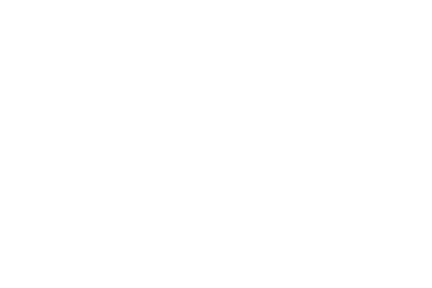

<IPython.core.display.Javascript object>


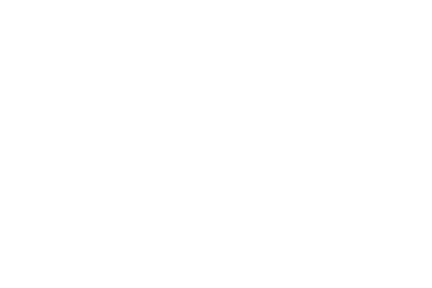

In [18]:

plt.scatter(Xt[500:,0],Xt[500:,1], c='g', s=100)
plt.scatter(Xt[:500,0],Xt[:500,1], c='r', s=100)

plt.title("Mapping by 1st Hidden of Neural Network")
plt.xlabel("Mapped feature by Neuron 1")
plt.ylabel("Mapped feature by Neuron 2")

fig_ml_in_10 = plt.gcf()
plt.savefig('nn-transformation-layer-1.svg',format='svg')